In [1]:
%%HTML
<style>
.bg-success {
    background-color: teal !important;
}

# @import url("https://bootswatch.com/4/lumen/bootstrap.css");
</style>

<h3 class='text-center jumbotron text-inf'> MNIST DATASET </h3>

In [2]:
from sklearn.datasets import fetch_openml
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
raw_data = fetch_openml('mnist_784',version=1)

In [4]:
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

<span class='badge bg-success'> Dataset </span>

In [5]:
data_x , data_y = raw_data['data'], raw_data['target']

In [6]:
data_x.shape, data_y.shape

((70000, 784), (70000,))

In [7]:
#There are 70000 rows and 784 columns

In [8]:
data_x[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
#There are all array's of data. But we can visualize it, as this array data is from a picture

<span class='badge bg-success'> Visualize </span>

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [11]:
data_x[0].shape #Checking first row

(784,)

In [12]:
first_pic = data_x[0].reshape(28,28) #Reshape to plot the data (x,y) 28*28 = 784

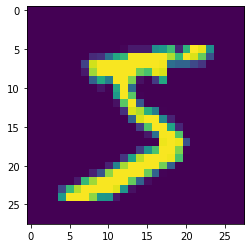

In [13]:
plt.imshow(first_pic);

##### Getting binary Image (black and white)

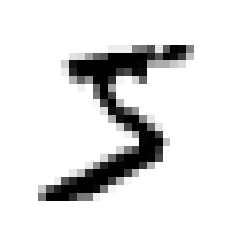

In [14]:
plt.imshow(first_pic,cmap=mpl.cm.binary,interpolation='nearest');
plt.axis('off');

In [15]:
#it seems like 5
#let's check the target data label of this rows

In [16]:
data_y[0]

'5'

#### Casting Number in all target values for getting the numeric dtype

In [17]:
type(data_y[0])

str

In [18]:
data_y = data_y.astype(np.uint8)

In [19]:
type(data_y[0])

numpy.uint8

<h4 class='text-center'> TRAIN TEST SPLIT </h4>

<p> </p>

* MNIST Dataset has already a train and split information
* Total data is 70k where train data takes 60k and for test data it takes last 10k
* MNIST Dataset has already shuffled 

In [20]:
x_train,x_test,y_train,y_test = data_x[:60000],data_x[60000:],data_y[:60000],data_y[60000:]

<h3 class='text-center text-danger'> ML MODEL </h3>
<h4 class='text-center text-info'> Stochastic
Gradient Descent (SGD) </h4>

##### checking only for letter 5

In [21]:
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)
#if 5 it will return True else False

In [22]:
y_train_5[:5] 

array([ True, False, False, False, False])

In [23]:
y_test_5[:5]

array([False, False, False, False, False])

<h4 class='text-center'> SGD </h4>

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf = SGDClassifier(random_state=123)

In [26]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=123)

In [27]:
sgd_clf.score(x_train,y_train_5)

0.9633166666666667

<span class="badge bg-success"> Predict </span>

In [28]:
y_5_preds = sgd_clf.predict(data_x[[0]]) #data_x[0] is image of number 5

In [29]:
y_5_preds

array([ True])

In [30]:
#it predicted right

<h2 class='text-center text-info'> EVALUATION </h2>

<p></p>

<span class="badge badge-primary"> Cross Val Score </span>

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95505, 0.9018 , 0.9697 ])

In [33]:
# We can see 3 different score with 3 cross valiation, they are all above 90% 
# But for CLassification model accuracy is not a very good measurement options 
# Most of the dataset here are skewed so it failed to determine the accuracy 

<h5 class='text-center text-info'> CONFUSION MATRIX </h5>

<span class="badge bg-success"> Cross Val Predict </span>

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
# cross val predict works as cross val score 
# but instead giving score it returns predicted value on corss validate 
# so if we use it on train_set to predict it will generatte a cross validate on train data assuming a test data set
# make sure to use the test data set after all of the evaluation

In [36]:
y_preds = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [37]:
y_preds

array([ True, False, False, ...,  True, False, False])

<span class="badge bg-success"> Confusion Matrix </span>

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_train_5,y_preds)

array([[51792,  2787],
       [  682,  4739]], dtype=int64)

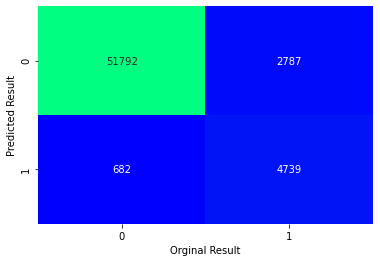

In [40]:
sns.heatmap(confusion_matrix(y_train_5,y_preds),cmap='winter',annot=True,fmt='2d',cbar=False)
plt.xlabel('Orginal Result')
plt.ylabel('Predicted Result');

In [41]:
#the model failed to predict on (2787 + 682) values
# FP = the model predicted 0(positive) where the actual value is 1(Positive) ; False Positive =  682
# FN = The model predicted 1(positive) where the actual value is 0(Negative) ; False Negative = 2787
# TP = The model predicted 1(positive) where the actual value is 1(postive); True positive = 4739
# TN = The model predicted 0(Negative) where the actual value is 0(Negative); True Negative = 51792

<span class="badge bg-success text-center"> Precision </span>

\begin{align*}\frac{TP}{TP+FP}\\\end{align*}

In [42]:
from sklearn.metrics import precision_score
precision_score(y_train_5,y_preds)

0.629683762955089

<span class="badge bg-success text-center"> Recall </span>

\begin{align*}\frac{TP}{TP+FN}\\\end{align*}

In [43]:
from sklearn.metrics import recall_score

In [44]:
recall_score(y_train_5,y_preds)

0.874192953329644

In [45]:
# The precision result is showing the model is good at predicting 5 is 62% 
# And the model is good at detecting image 5 ; 87%

<span class="badge bg-success text-center"> F1 Score </span>
##### It is a combinations of Precision and Recall. It is very good to compare model with other classifier model

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(y_train_5,y_preds)

0.7320614814242682

<h4 class='text-center text-info'> CONFUSION MATRIX </h4>
<br>

In [50]:
from sklearn.metrics import roc_curve, plot_roc_curve

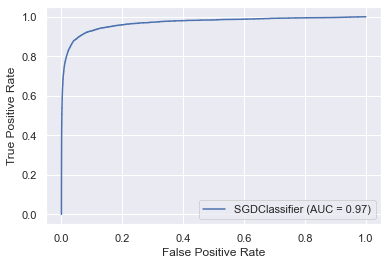

In [96]:
plot_roc_curve(sgd_clf,x_train,y_train_5);

In [54]:
#TRUE POSITIVE RATE  = RECALL 
#For some data we will need Recall Precision graph to check the precision on what recall
# Normally if precision increase the recall will decrease so dose vice versa
# but for MNIST Recall (how good the model detect the value) is very important
# And ROC curve is best to check it
# A robust roc curve will have AUC = 1 

##### Creating ROC curve for y_train_5

In [56]:
y_score = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')

In [57]:
y_score

array([  7998.26229468, -12397.98219471, -20893.77819228, ...,
         7689.55577585, -10765.50107007, -14795.82334034])

In [58]:
fpr,tpr,thresholds = roc_curve(y_train_5,y_score)

In [69]:
def plot_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    
    plt.title('ROC CURVE')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    
    plt.show()

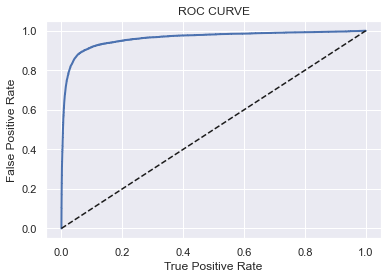

In [74]:
sns.set()
plot_curve(fpr,tpr)

<span class="badge bg-success"> RoC score </span>

In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
roc_auc_score(y_train_5,y_score)

0.9615776827903241

<h3 class='text-center text-danger'> ML MODEL </h3>
<h4 class='text-center text-info'> RANDOM FOREST CLASSIFICATION </h4>

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
forest_clf = RandomForestClassifier(random_state=124)

In [89]:
forest_clf.fit(x_train,y_train_5)

RandomForestClassifier(random_state=124)

<span class="badge bg-success"> Precision </p>

In [91]:
forest_preds = cross_val_predict(forest_clf,x_train,y_train_5,cv=3)

In [92]:
precision_score(y_train_5,forest_preds)

0.989909606895102

<span class="badge bg-success"> Recall </span>

In [93]:
recall_score(y_train_5,forest_preds)

0.8686589190186312

<span class="badge bg-primary"> Confusion Matrix </span>

In [95]:
confusion_matrix(y_train_5,forest_preds)

array([[54531,    48],
       [  712,  4709]], dtype=int64)

<span class="badge bg-success"> ROC CURVE </span>

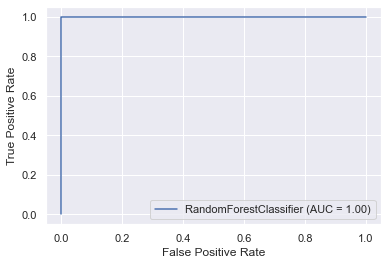

In [99]:
plot_roc_curve(forest_clf,x_train,y_train_5);

In [100]:
#creating roc curve with thresholds

In [101]:
y_probas_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [102]:
y_score_forest = y_probas_forest[:,1]

In [103]:
fpr_forest, tpr_forest,thresholds_forest = roc_curve(y_train_5,y_score_forest)

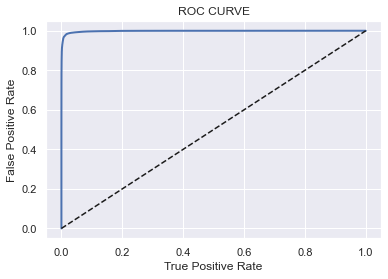

In [104]:
plot_curve(fpr_forest,tpr_forest)

<h4 class='text-center text-danger'> Comparison of ROC curve </h4>

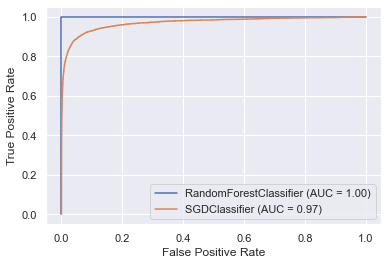

In [106]:
ax = plt.gca()
plot_roc_curve(forest_clf,x_train,y_train_5,ax=ax);
plot_roc_curve(sgd_clf,x_train,y_train_5,ax=ax);

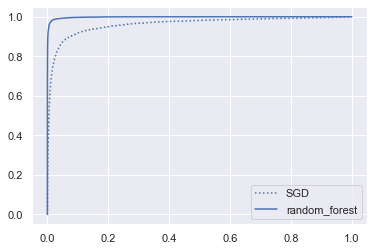

In [118]:
plt.plot(fpr,tpr,'b:',label='SGD')
plt.plot(fpr_forest,tpr_forest,label='random_forest')

plt.legend()
plt.show()

In [119]:
roc_auc_score(y_train_5,y_score_forest)

0.9982561828208051